## (1) Carga de paquetes necesarios

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR

## (2) Carga del DataFrame y slicing de la información

In [4]:
df = pd.DataFrame(np.load("proyecto_training_data.npy"),
                  columns=['SalePrice',
                           'OverallQual',
                           '1stFlrSF',
                           'TotRmsAbvGrd',
                           'YearBuilt',
                           'LotFrontage'])

In [5]:
entrenamiento = df.iloc[0:1168]
validacion_pruebas = df.iloc[1168:1459]

## (3) Análisis exploratorio

In [6]:
# Cálculo de medias
means = entrenamiento.mean()
print(means)

SalePrice       180590.277397
OverallQual          6.101027
1stFlrSF          1156.323630
TotRmsAbvGrd         6.485445
YearBuilt         1971.451199
LotFrontage         69.946985
dtype: float64


In [7]:
# Cálculo de máximos y mínimos
maximos = entrenamiento.max()
minimos = entrenamiento.min()
print(maximos)
print(minimos)

SalePrice       755000.0
OverallQual         10.0
1stFlrSF          3228.0
TotRmsAbvGrd        14.0
YearBuilt         2010.0
LotFrontage        313.0
dtype: float64
SalePrice       34900.0
OverallQual         1.0
1stFlrSF          334.0
TotRmsAbvGrd        2.0
YearBuilt        1875.0
LotFrontage        21.0
dtype: float64


In [8]:
# Cálculo del rango


In [9]:
# Cálculo de la desviación estándar
de = entrenamiento.std()
print(de)

SalePrice       78815.697902
OverallQual         1.378025
1stFlrSF          373.780374
TotRmsAbvGrd        1.609141
YearBuilt          29.951707
LotFrontage        23.478161
dtype: float64


## (4) Histogramas

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

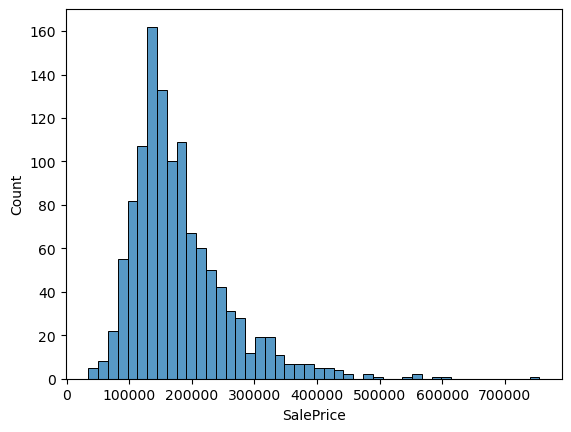

In [10]:
# Primer histrograma, precio de venta de la propiedad
sns.histplot(data = entrenamiento,
             x = 'SalePrice')

<AxesSubplot:xlabel='OverallQual', ylabel='Count'>

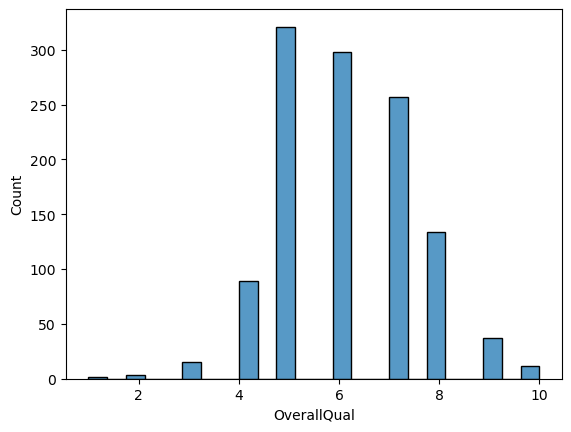

In [11]:
# Segundo histograma, calidad de la propiedad
sns.histplot(data = entrenamiento,
             x = 'OverallQual')

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

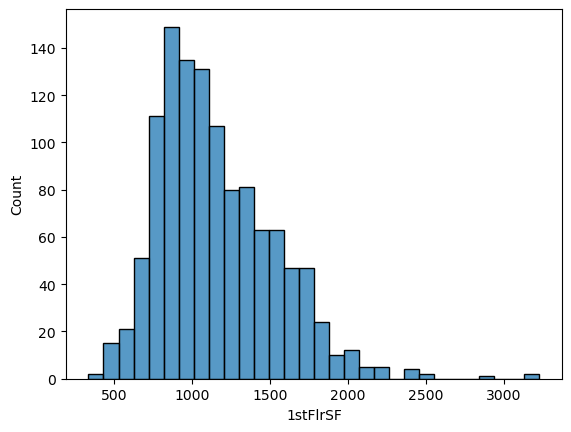

In [12]:
# Tercer histograma, área del primer piso
sns.histplot(data = entrenamiento,
             x = '1stFlrSF')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='Count'>

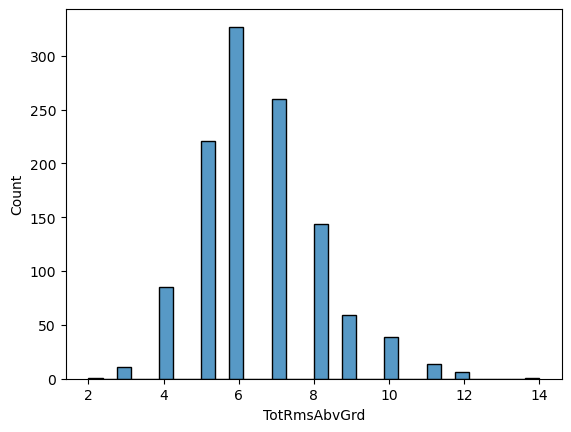

In [13]:
# Cuarto histograma, número total de habitaciones
sns.histplot(data = entrenamiento,
             x = 'TotRmsAbvGrd')

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

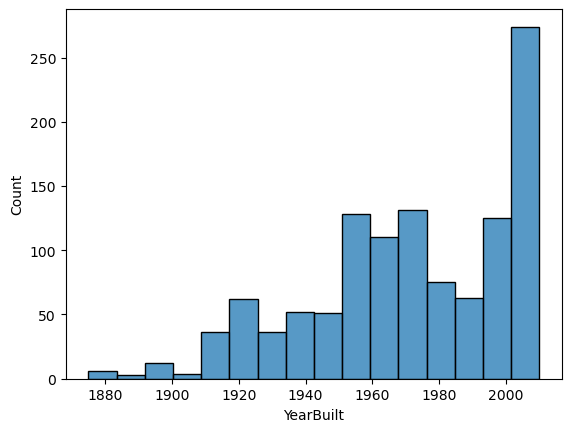

In [14]:
# Quinto histograma, año de construcción
sns.histplot(data = entrenamiento,
             x = 'YearBuilt')

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

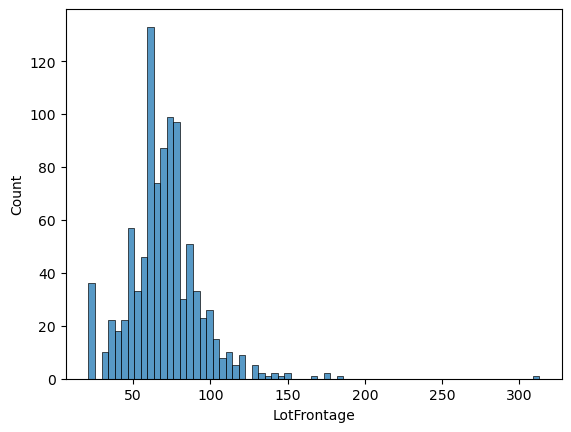

In [15]:
# Sexto histograma
sns.histplot(data = entrenamiento,
             x = 'LotFrontage')

## (5) Correlación

In [16]:
# Cálculo de la matriz de correlación
ccorr = entrenamiento.corr()
print(ccorr)

              SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  \
SalePrice      1.000000     0.793990  0.616289      0.564707   0.534171   
OverallQual    0.793990     1.000000  0.469411      0.444293   0.567313   
1stFlrSF       0.616289     0.469411  1.000000      0.409318   0.292074   
TotRmsAbvGrd   0.564707     0.444293  0.409318      1.000000   0.122911   
YearBuilt      0.534171     0.567313  0.292074      0.122911   1.000000   
LotFrontage    0.363292     0.242420  0.417388      0.341005   0.121474   

              LotFrontage  
SalePrice        0.363292  
OverallQual      0.242420  
1stFlrSF         0.417388  
TotRmsAbvGrd     0.341005  
YearBuilt        0.121474  
LotFrontage      1.000000  


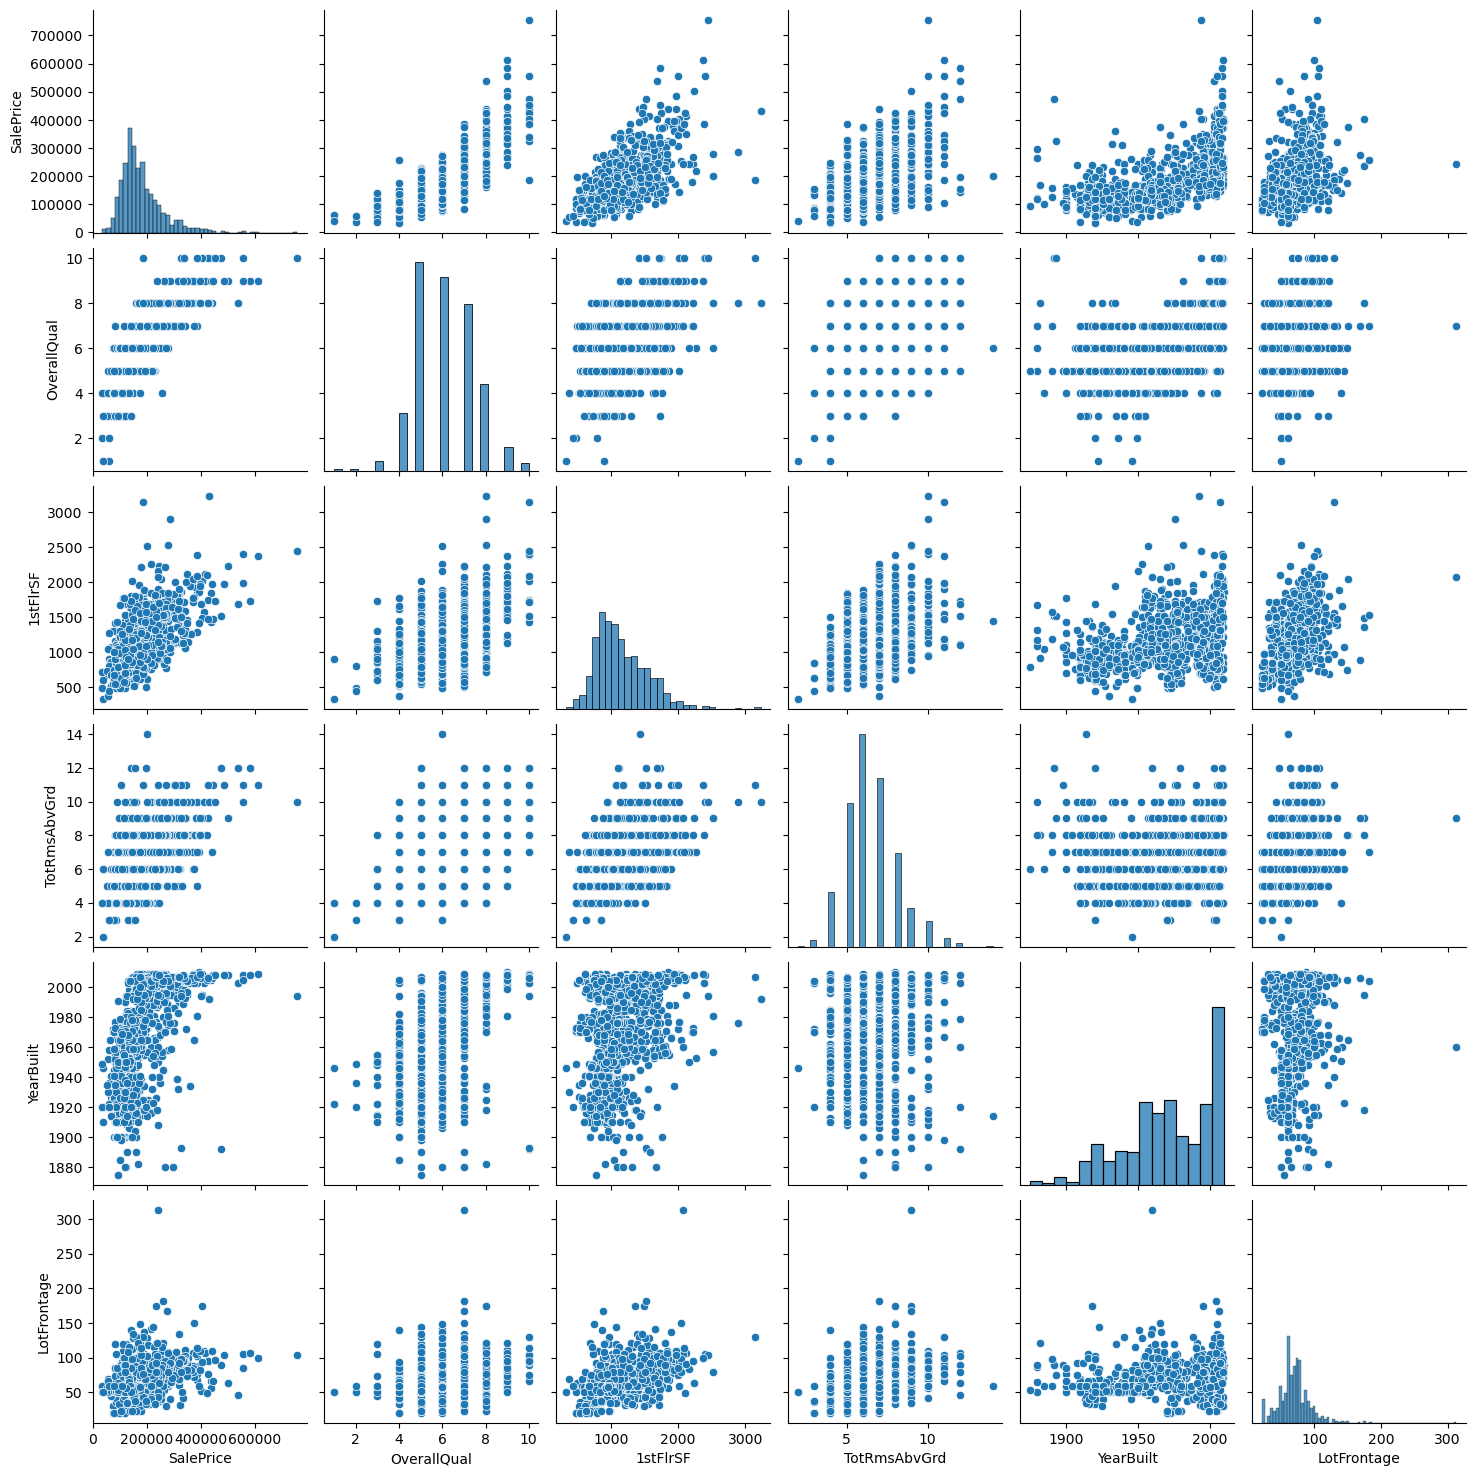

In [17]:
# Scatterplot
sns.pairplot(entrenamiento)

Al analizar la matriz de correlación y la matriz de gráficos de dispersión podemos decir que las mejores variables para la regresión lineal son y = SalePrice, x1 = OverallQual y x2 = 1stFlrSF.

## (6) Modelo de regresión lineal

In [18]:
def reglin(x,y,epochs,imprimir_error_cada,alfa):

    #M = np.array(x, np.ones(len(x)))
    n = len(y)
    beta0 = np.mean(x)
    beta1 = np.mean(y)
    y_inf = np.zeros(len(x))
    error = 0
    e = {}
    mod_resultante = {}

    for i in range(epochs):
        y_inf = beta0 + (beta1 * x)
        error = (1/(2*n)) * sum((y - y_inf)**2)
        e.update({i:[i,error]})
        grad_b1 = (1/n) * sum((y_inf-y) * x)
        grad_b0 = (1/n) * sum(y_inf-y)
        beta0 = beta0 - (alfa * grad_b0)
        beta1 = beta1 - (alfa * grad_b1)
        mod_resultante.update({i:np.array([i,beta0,beta1])})

        if (i % imprimir_error_cada) == 0:
            print(error)

    return [mod_resultante, e]

In [19]:
print(reglin(entrenamiento['OverallQual'],entrenamiento['SalePrice'],10000,1000,0.01))


442788621172.2298
1197829098.0402794
1166662092.6546328
1154574390.0262663
1149886337.6123786
1148068139.7206
1147362976.19387
1147089488.0319488
1146983419.3374197
1146942282.0250013
[{0: array([     0.        ,  -9205.9195097 , 121822.71277605]), 1: array([ 1.00000000e+00, -1.47403946e+04,  8.66069668e+04]), 2: array([ 2.00000000e+00, -1.80710027e+04,  6.55052323e+04]), 3: array([ 3.00000000e+00, -2.00808820e+04,  5.28616687e+04]), 4: array([ 4.00000000e+00, -2.12992753e+04,  4.52868732e+04]), 5: array([ 5.00000000e+00, -2.20433444e+04,  4.07496618e+04]), 6: array([ 6.00000000e+00, -2.25031562e+04,  3.80327971e+04]), 7: array([ 7.00000000e+00, -2.27926132e+04,  3.64068195e+04]), 8: array([ 8.00000000e+00, -2.29799743e+04,  3.54345819e+04]), 9: array([ 9.00000000e+00, -2.31061454e+04,  3.48541133e+04]), 10: array([ 1.00000000e+01, -2.31956401e+04,  3.45084209e+04]), 11: array([ 1.10000000e+01, -2.32631492e+04,  3.43034230e+04]), 12: array([ 1.20000000e+01, -2.33174761e+04,  3.41827388

442788621172.2298
1292709350.5277262
1275727480.1995525
1274512619.6370082
1273309768.541389
1272118256.7411418
1270937977.3208792
1269768824.3929615
1268610693.067966
1267463479.4452577


<AxesSubplot:xlabel='Iteración', ylabel='Error'>

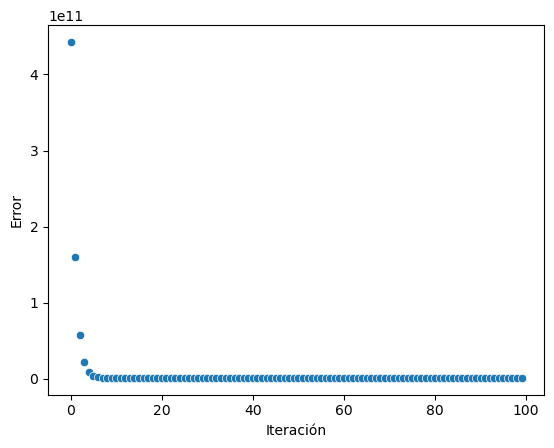

In [20]:
# Gráfica de error

Error = reglin(entrenamiento['OverallQual'],entrenamiento['SalePrice'],100,10,0.01)[1]

df_error = pd.DataFrame.from_dict(Error,
                                  orient='index',
                                  columns=['Iteración','Error'])
df_error
sns.scatterplot(data=df_error,
             x='Iteración',
             y="Error")

In [21]:
# Función para gráfica de evolución del modelo
def plot_evo(entrenamiento, modelo, n):

    for i in modelo['Iteración']:

        if (i % n) == 0:
            #plt.figure(1)
            x1 = np.array([1,2,3,4,5,6,7,8,9,10])
            y1 = modelo['Beta_0'][i] + modelo['Beta_1'][i] * x1

            #plt.figure(2)
            x2 = entrenamiento['OverallQual']
            y2 = entrenamiento['SalePrice']

            plt.plot(x1,y1)
            plt.scatter(x2,y2)
            plt.title('Evolución Modelo Regresión Lineal')

    return plt.show()
            

442788621172.2298
1266327080.6036756
1255535944.5888019
1245720001.4112813
1236791123.0863788
1228669145.7379923
1221281149.883712
1214560805.7604072
1208447777.8125815
1202887182.9970071


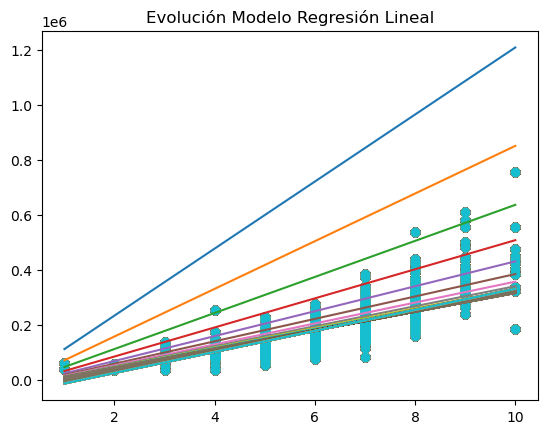

In [22]:
Modelo = reglin(entrenamiento['OverallQual'],entrenamiento['SalePrice'],1000,100,0.01)[0]

df_modelo = pd.DataFrame.from_dict(Modelo,
                                   orient='index',
                                   columns=['Iteración',
                                            'Beta_0',
                                            'Beta_1'])
df_modelo

plot_evo(entrenamiento,df_modelo,1)

In [23]:
X = np.array(entrenamiento['OverallQual']).reshape(-1,1)
Y = np.array(entrenamiento['SalePrice']).reshape(-1,1)

reg = LR().fit(X,Y)

LinearRegression()

In [41]:
reg_manual = reglin(entrenamiento['OverallQual'],entrenamiento['SalePrice'],1000,100,0.01)[0]
reg_manual = list(reg_manual.values())
reg_manual = reg_manual[len(reg_manual)-1]
b0 = reg_manual[1]
b1 = reg_manual[2]

x = np.array(validacion_pruebas['OverallQual'])
X = x.reshape(-1,1)

y = b0 + (b1 * x)
Y = reg.predict(X)

y_error = validacion_pruebas['SalePrice'] - y
Y_error = np.array(validacion_pruebas['SalePrice']).reshape(-1,1) - Y

print(np.mean(y_error))
print(np.mean(Y_error))


442788621172.2298
1266327080.6036756
1255535944.5888019
1245720001.4112813
1236791123.0863788
1228669145.7379923
1221281149.883712
1214560805.7604072
1208447777.8125815
1202887182.9970071
-211.5187059492512
1992.3072835908742


Notemos que la media de la diferencia de SalePrice con el modelo manual es -211.51 y con el modelo sklearn es 1992.30. Por lo que se puede concluír que el modelo manual es mejor para utilizarlo.